In [73]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "crop_yield.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "akshatgupta7/crop-yield-in-indian-states-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'crop-yield-in-indian-states-dataset' dataset.
First 5 records:            Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42  


In [74]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [76]:
df = pd.read_csv("/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv")

In [77]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


In [78]:
# Checking for unique columns
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print('-' * 50)

Unique values in column 'Crop':
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
--------------------------------------------------
Unique values in column 'Crop_Year':
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
--------------------------------------------------
Unique values in column 'Sea

In [79]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
7482,Mesta,2001,Kharif,Bihar,15374.00,99904,1247.00,1570146.62,3997.24,5.90
3370,Moong(Green Gram),2011,Rabi,Assam,11512.00,6347,1743.40,1928490.24,3798.96,0.52
11997,Bajra,2011,Kharif,Bihar,4457.00,5014,1097.10,746636.64,1470.81,1.09
16805,Gram,2019,Rabi,Haryana,43970.00,47090,351.80,7552287.20,16268.90,1.17
18714,Wheat,2006,Rabi,Sikkim,6380.00,10360,2270.20,814789.80,1403.60,1.57


In [80]:
# Titling every value from the given columns
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In [81]:
df.shape

(19689, 10)

In [82]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [84]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small Millets,1998,Kharif,Nagaland,4000.00,2000,1498.00,395200.00,1160.00,0.50
19685,Wheat,1998,Rabi,Nagaland,1000.00,3000,1498.00,98800.00,290.00,3.00
19686,Maize,1997,Kharif,Jammu And Kashmir,310883.00,440900,1356.20,29586735.11,96373.73,1.28
19687,Rice,1997,Kharif,Jammu And Kashmir,275746.00,5488,1356.20,26242746.82,85481.26,0.02
19688,Wheat,1997,Rabi,Jammu And Kashmir,239344.00,392160,1356.20,22778368.48,74196.64,1.26


In [85]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64", "float64"]).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00,2009.13,6.50,1997.00,2004.00,2010.00,2015.00,2020.00
Area,19689.00,179926.57,732828.68,0.50,1390.00,9317.00,75112.00,50808100.00
Production,19689.00,16435941.27,263056839.81,0.00,1393.00,13804.00,122718.00,6326000000.00
Annual_Rainfall,19689.00,1437.76,816.91,301.30,940.70,1247.60,1643.70,6552.70
Fertilizer,19689.00,24103312.45,94946004.48,54.17,188014.62,1234957.44,10003847.20,4835406877.00
Pesticide,19689.00,48848.35,213287.35,0.09,356.70,2421.90,20041.70,15750511.00
Yield,19689.00,79.95,878.31,0.00,0.60,1.03,2.39,21105.00


In [86]:
df.describe(include=["object"]).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


In [87]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [88]:
df.duplicated().sum()

np.int64(0)

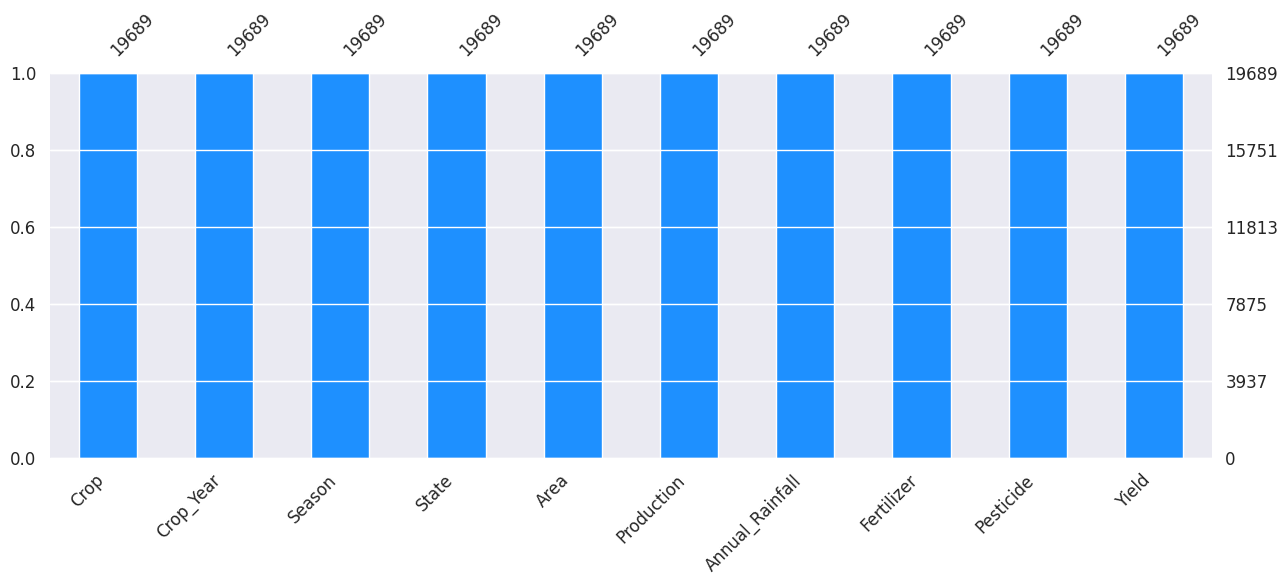

In [89]:
missingno.bar(df, figsize=(15,5), fontsize=12,color="dodgerblue", sort="ascending");
plt.show()

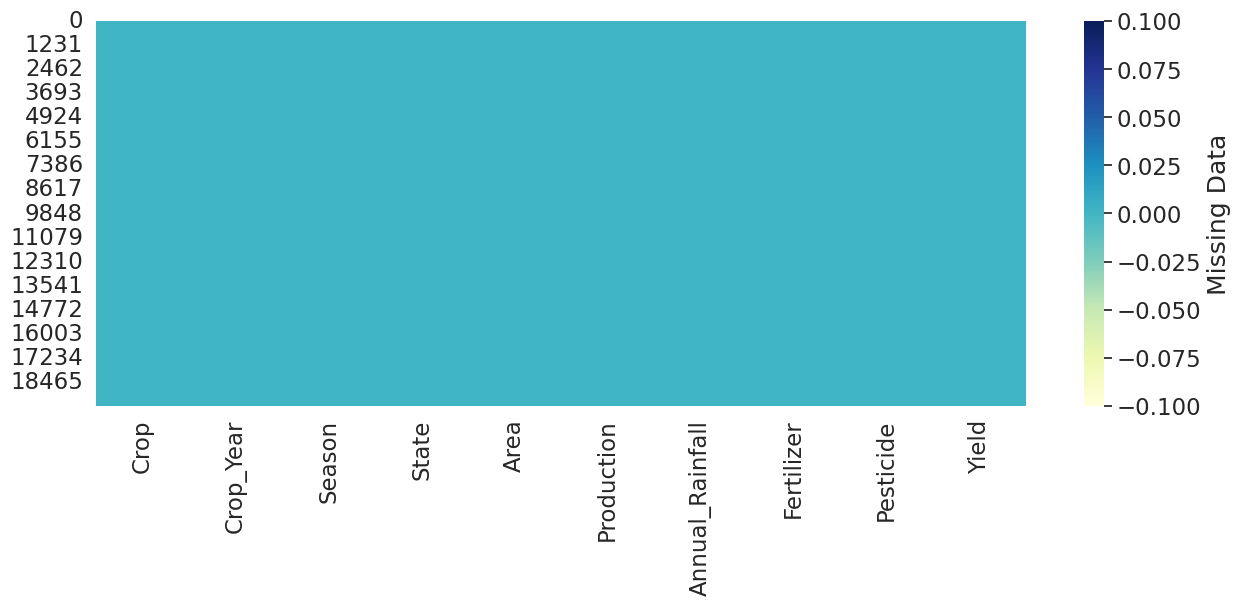

In [90]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'});

In [91]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,1997,796.00,22,2051.40,75755.32,246.76,0.24
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42


In [92]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


In [93]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


<Axes: >

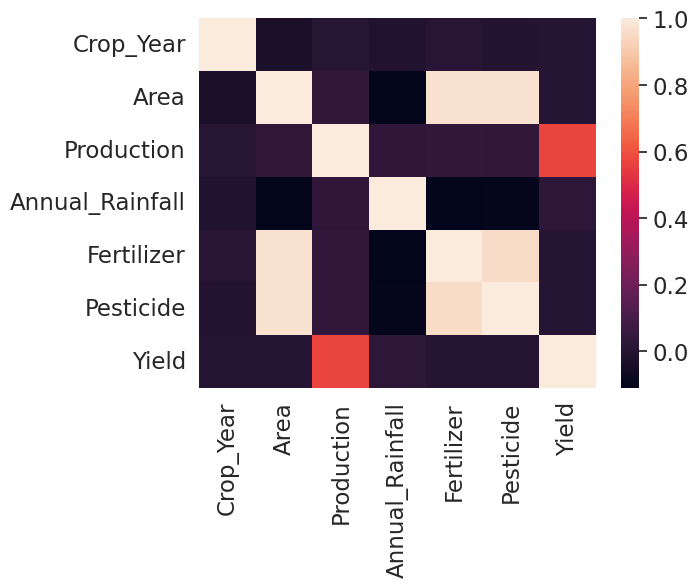

In [94]:
sns.heatmap(numeric_data.corr())

In [95]:
df['Crop_Year'].value_counts(ascending=False)

,count
Crop_Year,
2019,1079
2017,1070
2018,1063
2016,1036
2015,998
2013,976
2014,965
2011,907
2012,894


In [96]:
df = df[df['Crop_Year'] != 2020]

In [97]:
df['Crop'].value_counts()

,count
Crop,
Rice,1195
Maize,973
Moong(Green Gram),738
Urad,731
Groundnut,724
Sesamum,684
Potato,626
Sugarcane,604
Wheat,544


In [98]:
df['Season'].value_counts(ascending=False)

,count
Season,
Kharif,8215
Rabi,5732
Whole Year,3712
Summer,1190
Autumn,414
Winter,389


In [99]:
df['State'].value_counts(ascending=False)

,count
State,
Karnataka,1432
Andhra Pradesh,1266
West Bengal,1094
Chhattisgarh,915
Bihar,896
Madhya Pradesh,845
Uttar Pradesh,825
Tamil Nadu,822
Gujarat,817


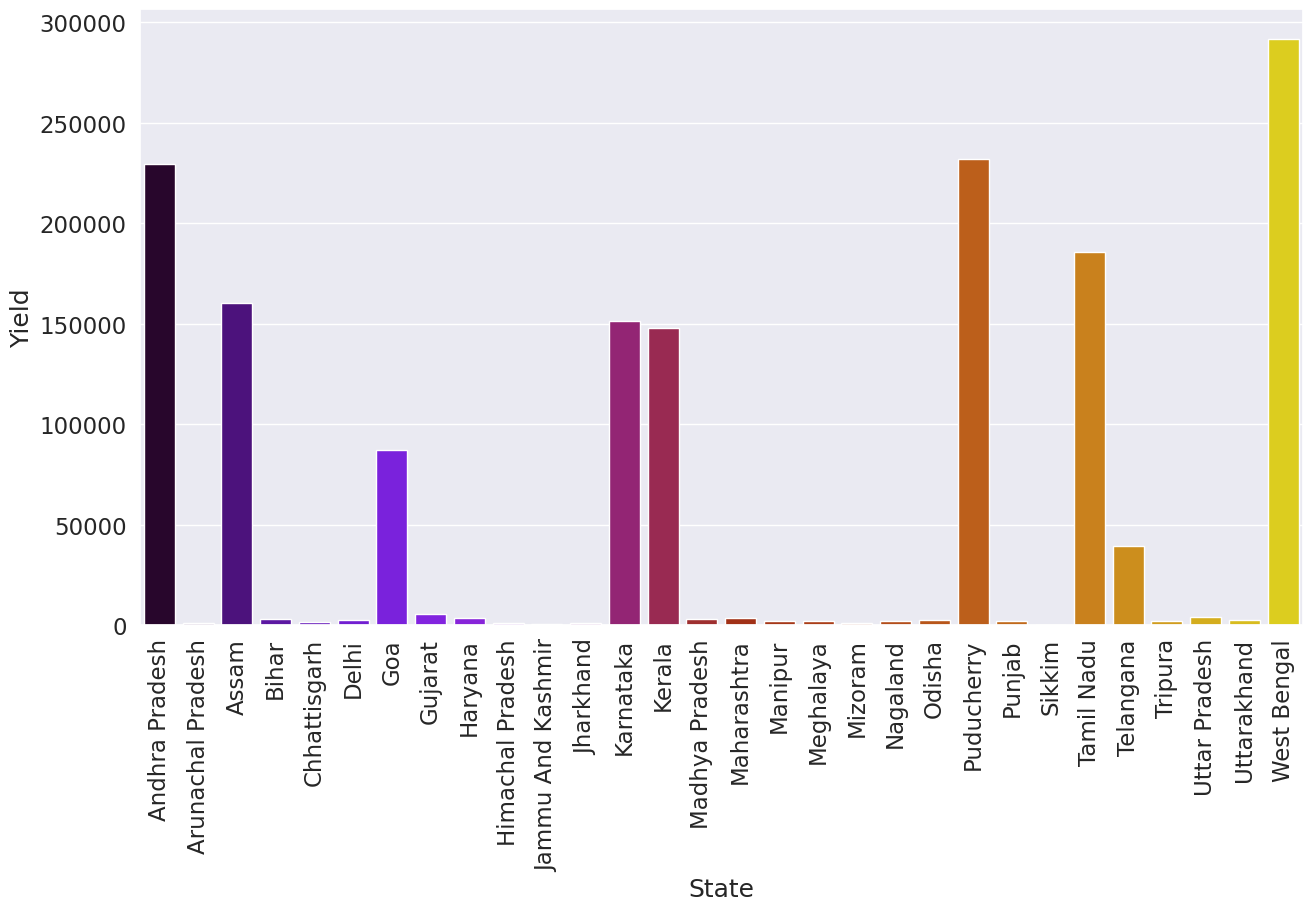

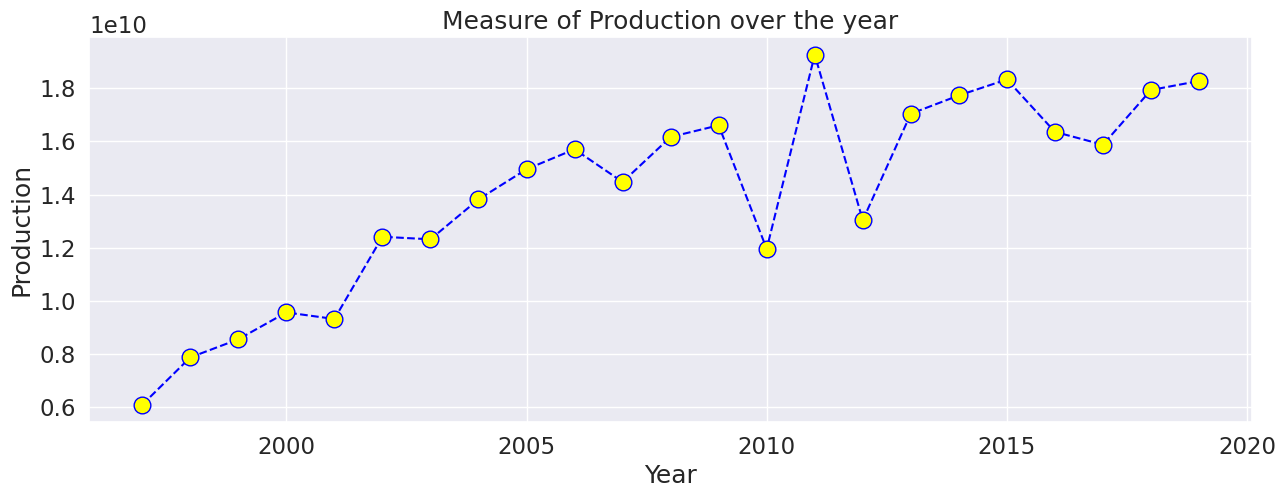

In [100]:
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

In [101]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


In [102]:
df_production_by_state = df.groupby('State', as_index=False)['Production'].sum()
top_10_states_production = df_production_by_state[df_production_by_state['State'].isin(top_10_states['State'])]

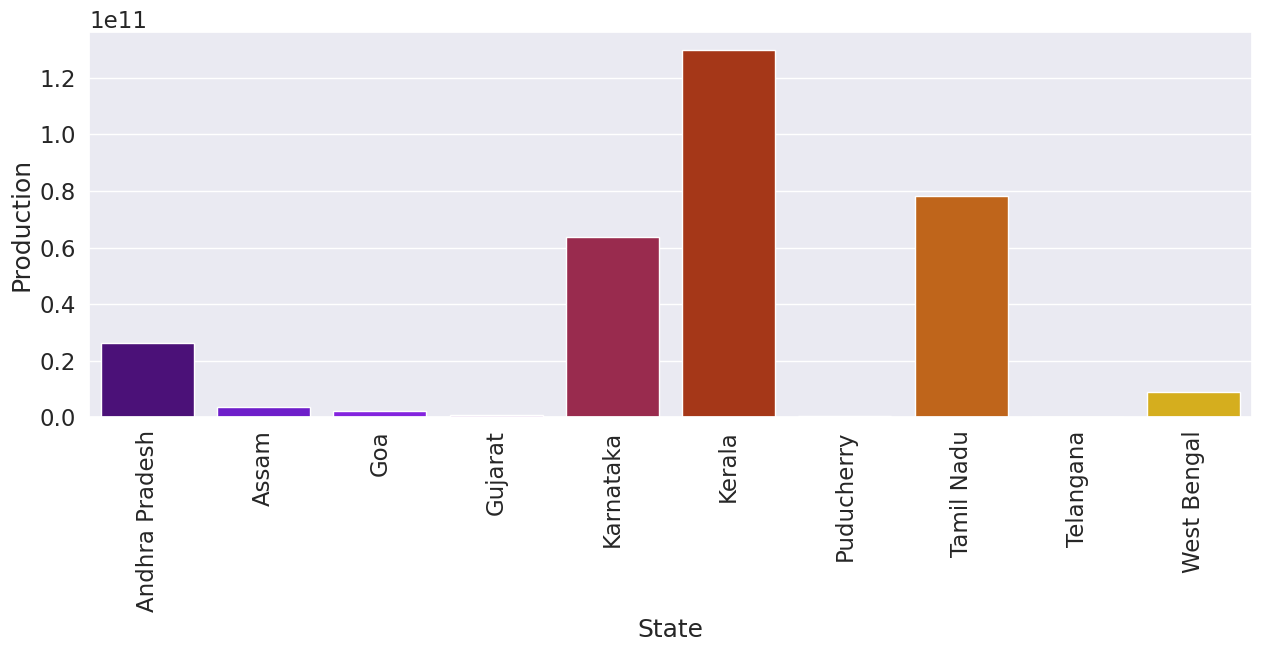

In [103]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states_production['State'], y=top_10_states_production['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [104]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


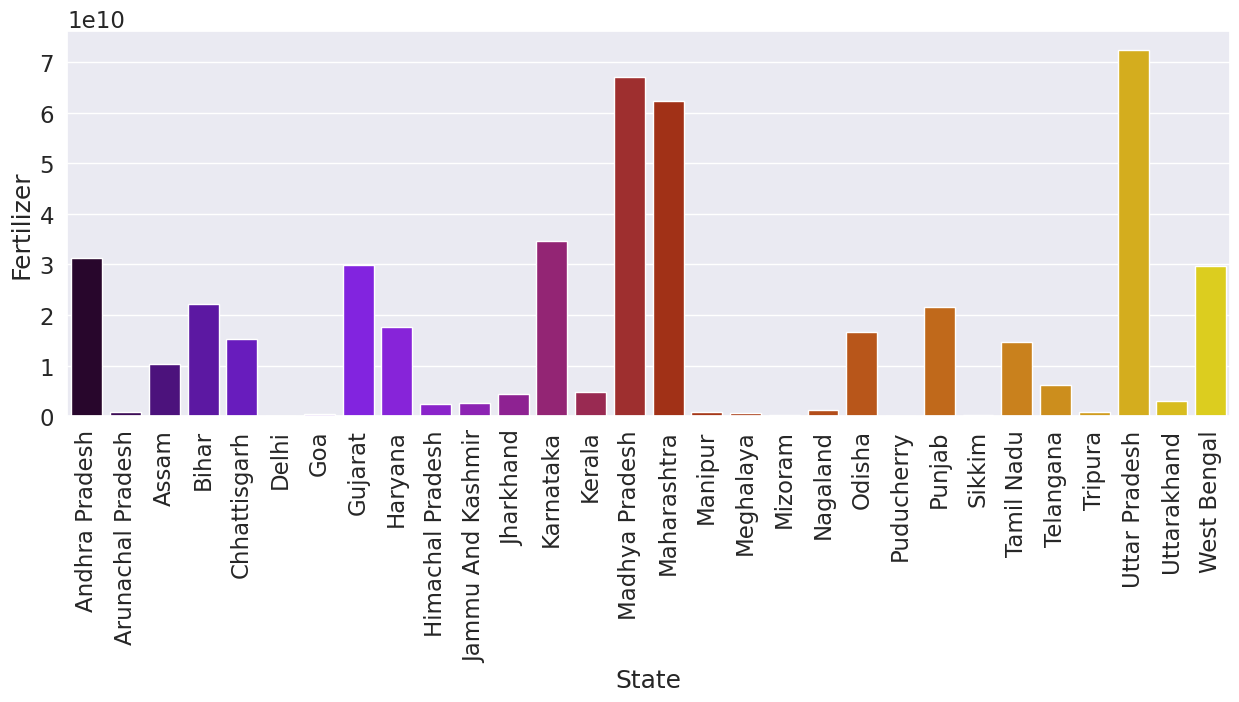

In [105]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

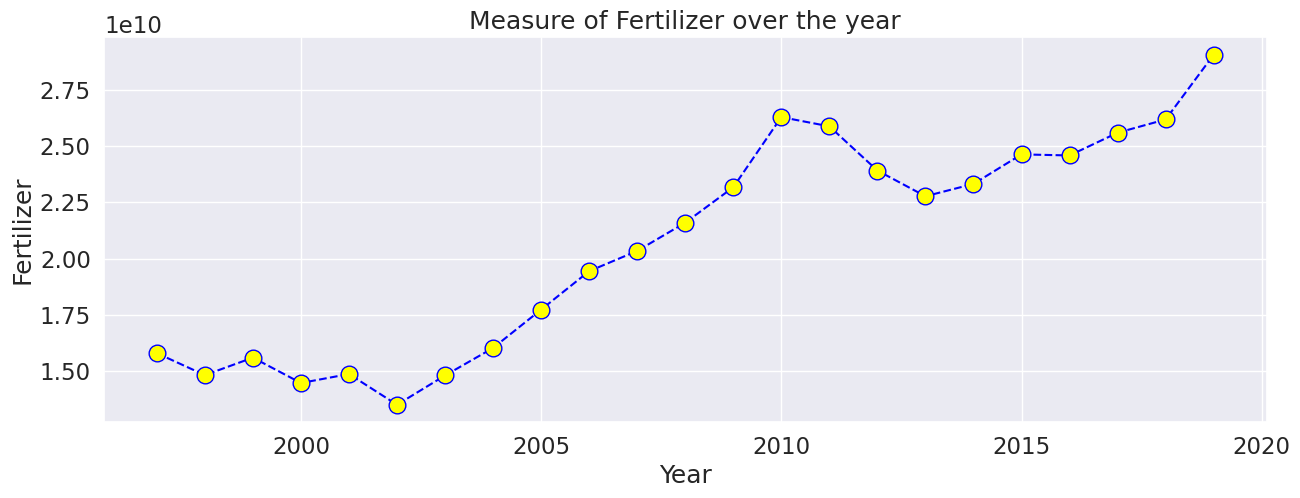

In [106]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

In [107]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


In [108]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


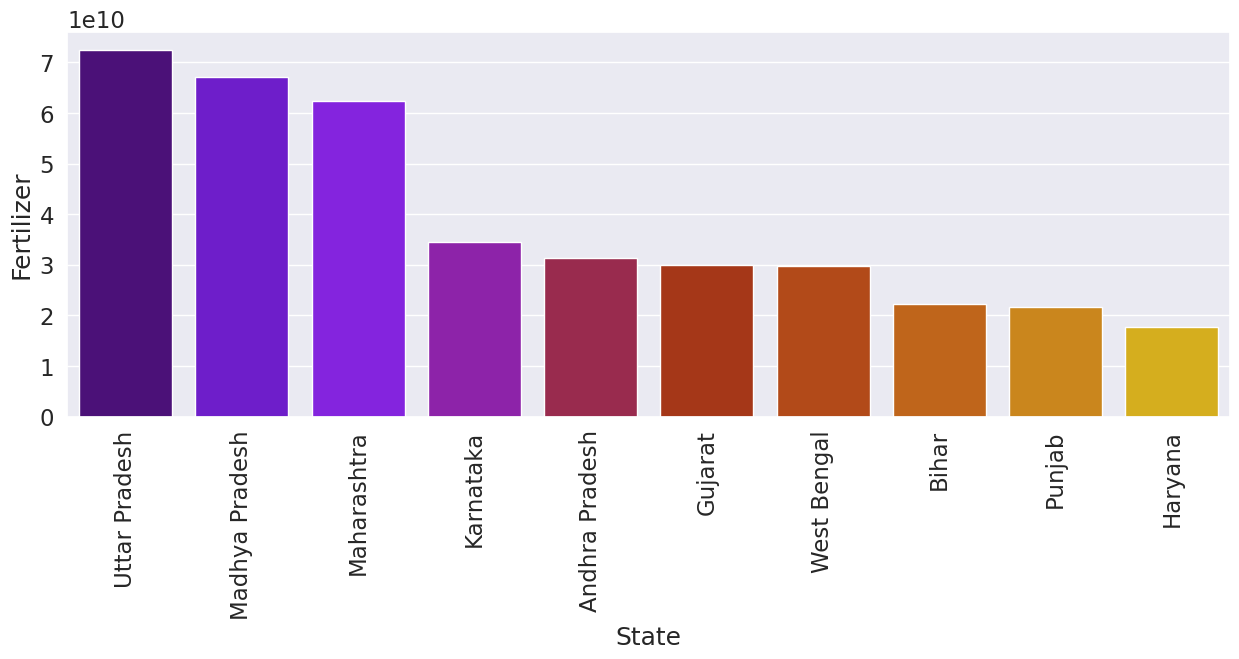

In [109]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [110]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


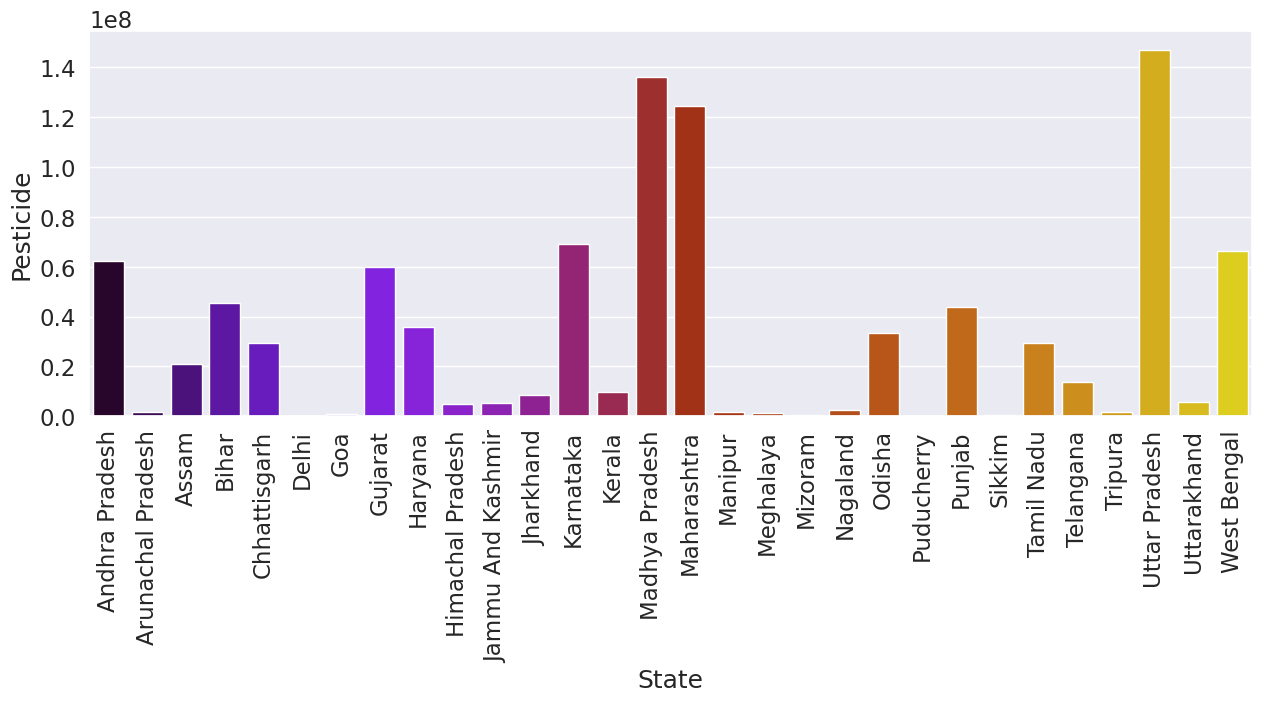

In [111]:

df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

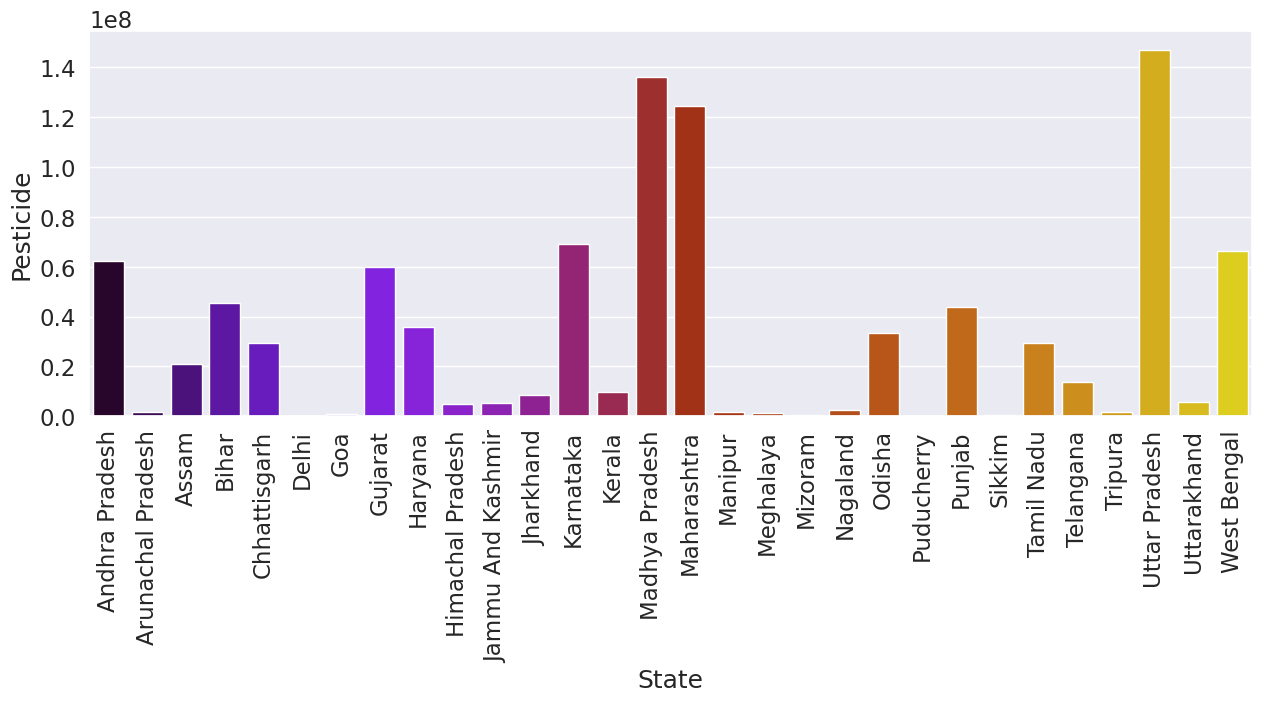

In [112]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [113]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


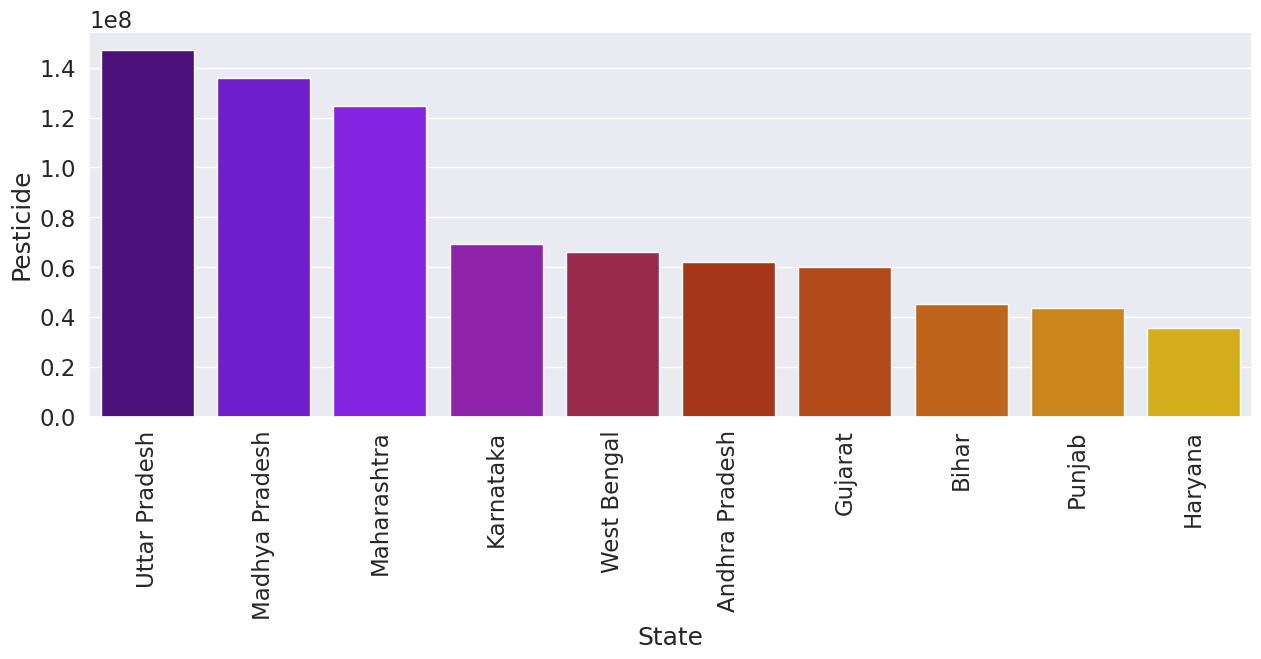

In [114]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [115]:
df_new = df.drop(columns = ['Area','Production'], axis = 1)

In [117]:
category_columns = df_new.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [118]:
df_new = pd.get_dummies(df_new, columns = category_columns, drop_first = True)

In [119]:
df_new.shape

(19652, 93)

In [120]:
df_new.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1997,2051.40,631643.29,2057.47,0.71,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1997,2051.40,75755.32,246.76,0.24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1997,2051.40,1870661.52,6093.36,5238.05,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1997,2051.40,165500.63,539.09,0.42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [121]:
x = df_new.drop(['Yield'], axis = 1)
y = df_new['Yield']

In [123]:
x.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1997,2051.40,631643.29,2057.47,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1997,2051.40,75755.32,246.76,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1997,2051.40,1870661.52,6093.36,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1997,2051.40,165500.63,539.09,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Fals

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 92)
y_train - >   (15721,)
x_test  - >   (3931, 92)
y_test  - >   (3931,)


# Performances and Metrics

In [127]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

# Checking for skewedness

In [128]:
skewness = df_new[['Annual_Rainfall','Fertilizer','Pesticide']].skew().sort_values()
skewness

,0
Annual_Rainfall,2.13
Fertilizer,13.40
Pesticide,25.61


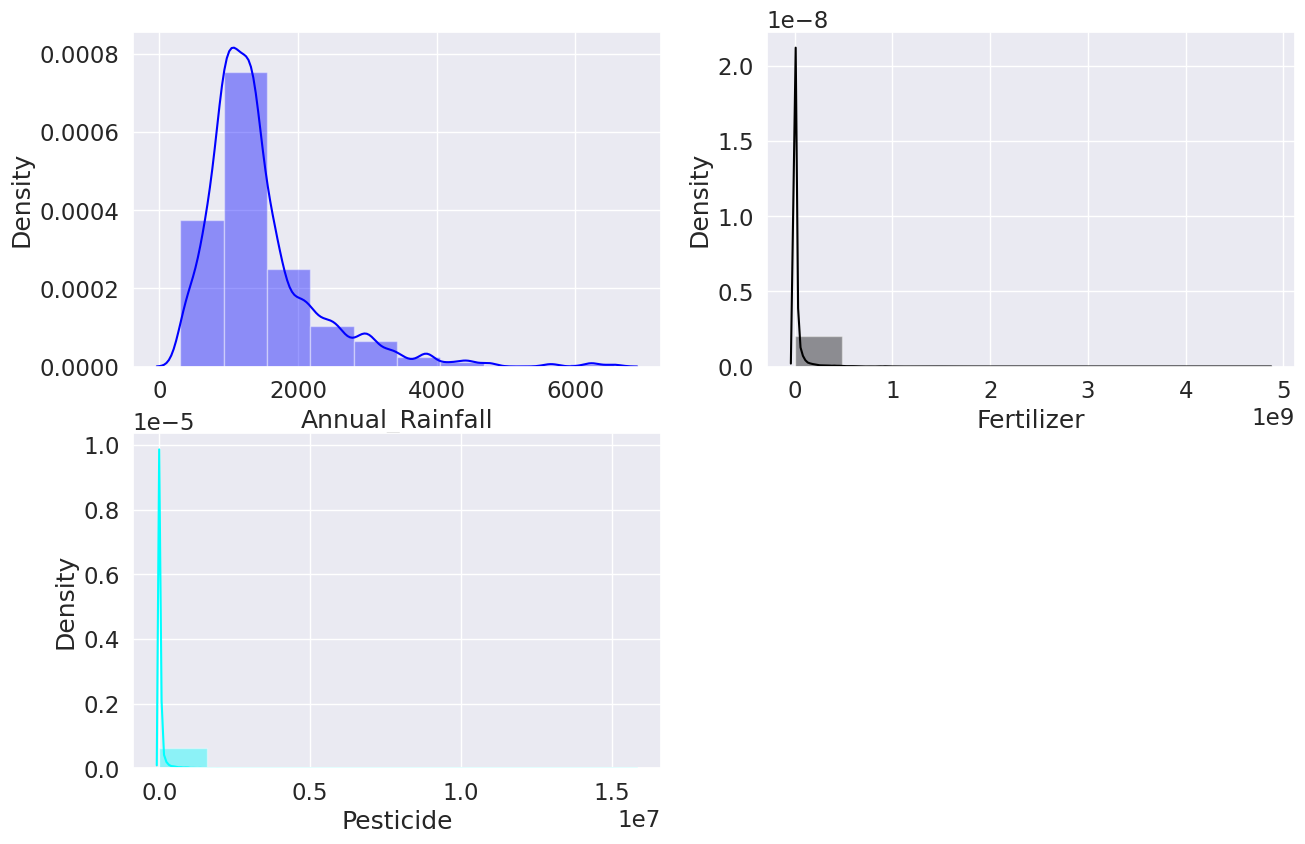

In [129]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()


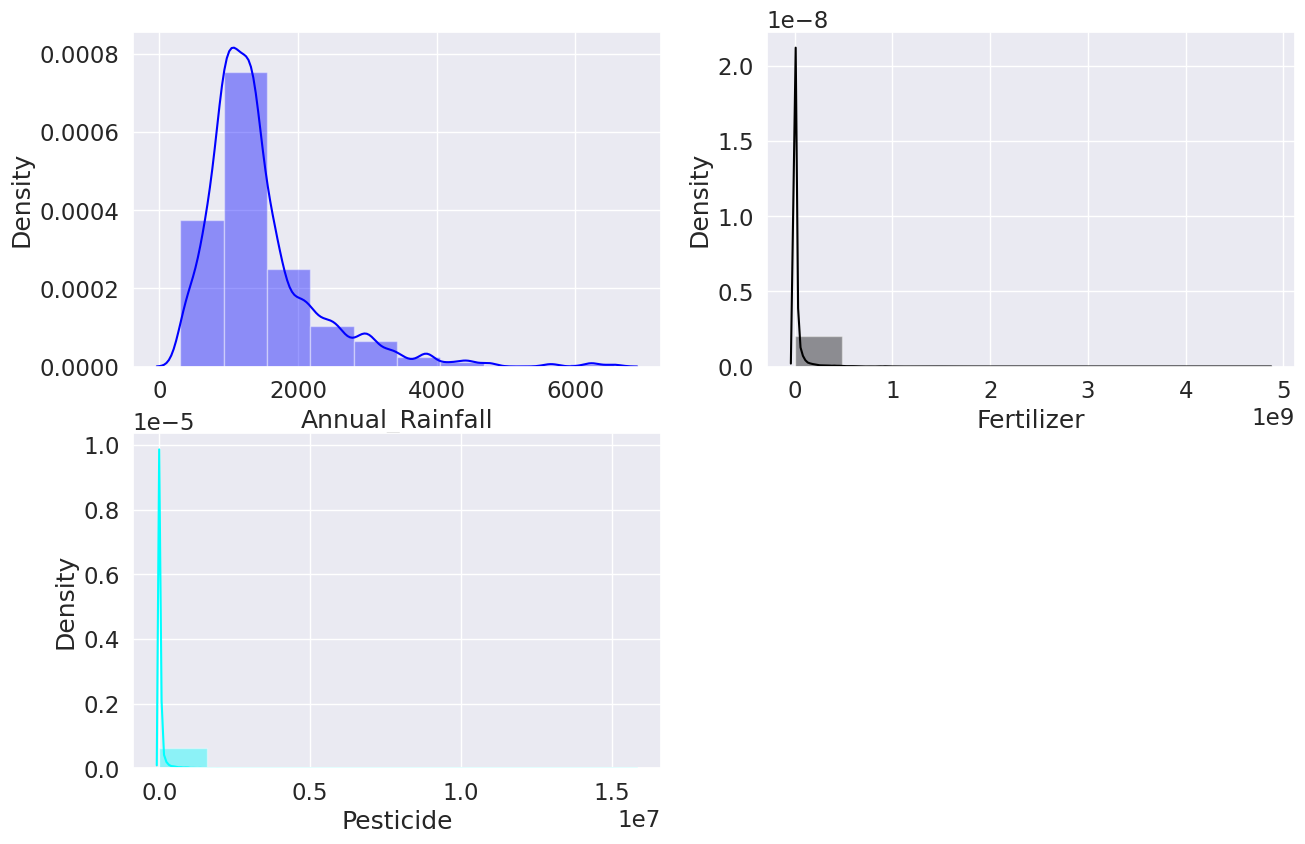

In [130]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()

In [131]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield']

# Variance Inflation Factor

In [132]:
vif_columns = [col for col in df.columns if col not in exclude_column]

vif1 = df[vif_columns].copy()

In [133]:
variable = vif1.astype(float) # Convert boolean columns to float (0.0 or 1.0)
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [134]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
0,34.47,Area
3,20.54,Fertilizer
4,20.50,Pesticide
2,1.03,Annual_Rainfall
1,1.01,Production


In [135]:
vif2 = vif1.copy()

vif2.drop(['Fertilizer'], axis = 1, inplace=True)

In [136]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield','Area']

In [139]:
vif_columns = [col for col in vif2.columns if col not in exclude_column]

In [140]:
variable = vif2.astype(float)
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif_columns_updated = [col for col in vif2.columns] # Update vif_columns
vif['Features'] = vif_columns_updated # Assign updated vif_columns

In [141]:
df_new_encoding = df_new.copy()
df_new_encoding = df_new_encoding.drop(['Crop_Year'], axis = 1)

In [142]:
df_new_encoding = df_new_encoding.drop(['Fertilizer'], axis = 1)

In [143]:
df_new_encoding.head()

,Annual_Rainfall,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,2051.40,22882.34,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2051.40,2057.47,0.71,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2051.40,246.76,0.24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2051.40,6093.36,5238.05,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2051.40,539.09,0.42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,Fa

In [144]:
category_columns = df_new_encoding.select_dtypes(include = ['object']).columns
category_columns

Index([], dtype='object')

In [145]:
df_new_encoding = pd.get_dummies(df_new_encoding, columns = category_columns, drop_first=True)

In [146]:

boolean_cols_auto = df_new_encoding.select_dtypes(include=['bool']).columns
df_new_encoding[boolean_cols_auto] = df_new_encoding[boolean_cols_auto].astype(int)

In [147]:
df_new_encoding.head()

,Annual_Rainfall,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,2051.40,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2051.40,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2051.40,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2051.40,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2051.40,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
x = df_new_encoding.drop(['Yield'], axis = 1)
y = df_new_encoding['Yield']

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 90)
y_train - >   (15721,)
x_test  - >   (3931, 90)
y_test  - >   (3931,)


# Power Transformer

In [151]:
pt = PowerTransformer(method='yeo-johnson')

x_train_scaled = pt.fit_transform(x_train)
x_test_scaled = pt.transform(x_test)

# Evaluating the model

In [152]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [153]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.

    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))

    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

    return model # Return the trained model

In [154]:
trained_xgb_model = evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 99.95%, Adjusted R² = 99.95%, RMSE = 19.2660
Testing Data : R² = 97.19%, Adjusted R² = 97.12%, RMSE = 139.3308



In [155]:
import pickle

# Save the trained model to a file
filename = 'xgbregressor_model.pkl'
pickle.dump(trained_xgb_model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to xgbregressor_model.pkl
